# Classical Linear Regression Model on Salary Prediction Dataset
## Author: Cody Ourique

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np 

In [2]:
def one_hot_encoding(df, type):
    return pd.get_dummies(df, dtype = type)

## Data Preprocessing

### Data Understanding

In [3]:
data = pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
data["Age"].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., nan])

In [6]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [8]:
data["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [9]:
data["Years of Experience"].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5,  nan])

In [10]:
data["Salary"].unique()

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000., 130000.,  40000.,
       125000., 115000.,  35000., 180000., 190000.,  50000., 250000.,
       170000., 160000.,  85000.,  95000., 105000.,  70000., 100000.,
        30000., 135000., 220000., 175000., 185000.,     nan, 145000.,
       155000.,    350.])

### Feature Selection

<AxesSubplot:>

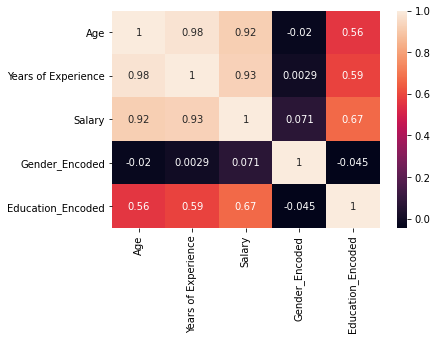

In [13]:
# Encode the categorical data
data_fs = data.copy()
data_fs['Gender_Encoded'] = data_fs['Gender'].map({'Female': 0, 'Male': 1})
data_fs.drop(columns=['Gender'], inplace=True)

# Create map for tenary encoding
education_mapping = {
    "Bachelor's": 0,
    "Master's": 1,
    "PhD": 2
}

# Perform ternary encoding
data_fs['Education_Encoded'] = data_fs['Education Level'].map(education_mapping)
data_fs.drop(columns=['Education Level'], inplace=True)

data_numeric = data_fs.select_dtypes(include=['number'])

# Check for multicollinearity amongst numerical values
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)

### Data Cleaning

In [14]:
# Check for and drop rows with missing values
data = data.drop( ['Age', 'Gender','Job Title'], axis=1)

print(f'{data.isna().sum()}\n')
data.dropna(inplace=True)
print(data.isna().sum())

Education Level        2
Years of Experience    2
Salary                 2
dtype: int64

Education Level        0
Years of Experience    0
Salary                 0
dtype: int64


In [15]:
# Select only non numeric columns and apply one hot encoding
data_non_numeric = data.select_dtypes(exclude=['number'])
data_encoded = one_hot_encoding(data_non_numeric, float)

data_encoded.head()





,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [16]:
# Extract numerical columns from dataset and merge them with the encoded dataframe
data_numeric = data.select_dtypes(include=['number'])
data_final = pd.concat([data_numeric, data_encoded], axis=1)
print(data_final.head())

   Years of Experience    Salary  Education Level_Bachelor's  \
0                  5.0   90000.0                         1.0   
1                  3.0   65000.0                         0.0   
2                 15.0  150000.0                         0.0   
3                  7.0   60000.0                         1.0   
4                 20.0  200000.0                         0.0   

   Education Level_Master's  Education Level_PhD  
0                       0.0                  0.0  
1                       1.0                  0.0  
2                       0.0                  1.0  
3                       0.0                  0.0  
4                       1.0                  0.0  


### Data Splitting

In [17]:
data_targets = pd.DataFrame(data_final["Salary"])
data_features = data_final.drop(columns = ["Salary"])
X_train, X_test, y_train, y_test = train_test_split(data_features.values, data_targets.values.ravel(), test_size=0.2, random_state=42)

## Train Linear Regression Model 

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# logistic_model = logistic_regression_grid_search(logistic, X_train, y_train)
y_pred = linear_model.predict(X_test)

### Print Metrics

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mean_y = np.mean(y_test)
mse_percentage = mean_absolute_percentage_error(y_test,y_pred)
accuracy = (1-mse_percentage)*100
print(f'Mean Squared Error: {mse}\n')
print(f'Mean Squared Error Percentage: {mse_percentage}\n')
print(f'R2 Score: {r2}\n')
print(f'Mean Absolute Error: {mae}\n')
print(f'Accuracy: {accuracy}')

# save_model('saved_models/logistic_regression.sav',linear_model)

Mean Squared Error: 233165175.58398533

Mean Squared Error Percentage: 0.11216066142492612

R2 Score: 0.9027498730083701

Mean Absolute Error: 10699.551743554706

Accuracy: 88.78393385750739
